In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create planet objects
planet1=Planet("VENUS")
planet1.h_skip = 150e3
planet1.h_trap = 0

planet2=Planet("EARTH")
planet2.h_skip = 140e3
planet2.h_trap = 0

planet3=Planet("MARS")
planet3.h_skip = 120e3
planet3.h_trap = 0

planet4=Planet("JUPITER")
planet4.h_skip = 1000e3
planet4.h_trap = 0

planet5=Planet("SATURN")
planet5.h_skip = 1000e3
planet5.h_trap = 0

planet6=Planet("TITAN")
planet6.h_skip = 1000e3
planet6.h_trap = 0

planet7=Planet("URANUS")
planet7.h_skip = 1000e3
planet7.h_trap = 0

planet8=Planet("NEPTUNE")
planet8.h_skip = 1000e3
planet8.h_trap = 0

# Load an nominal atmospheric profile with height, temp, pressure, density data
planet1.loadAtmosphereModel('../atmdata/venus-gram-avg.dat', 0 , 1 ,2, 3)
planet2.loadAtmosphereModel('../atmdata/earth-gram-avg.dat', 0 , 1 ,2, 3)
planet3.loadAtmosphereModel('../atmdata/mars-gram-avg.dat', 0 , 1 , 2, 3)
planet4.loadAtmosphereModel('../atmdata/jupiter-galileo-asi.dat', 0 , 1 , 2, 3, heightInKmFlag=True)
planet5.loadAtmosphereModel('../atmdata/saturn-nominal.dat', 0 , 1 , 2, 3, heightInKmFlag=True)
planet6.loadAtmosphereModel('../atmdata/titan-gram-avg.dat', 0 , 1 , 2, 3)
planet7.loadAtmosphereModel('../atmdata/uranus-gram-avg.dat', 0 , 1 , 2, 3, heightInKmFlag=True)
planet8.loadAtmosphereModel('../atmdata/neptune-gram-avg.dat', 0 , 7 ,6, 5 , heightInKmFlag=True)

In [3]:
vehicle1=Vehicle('Venus', 125, 365 , 0.0, 0.25*3.14*0.66**2, 0.0, 0.33, planet1)
vehicle1.setInitialState(150.0,0.0,0.0,11,0.0,-10,0.0,0.0)
vehicle1.setSolverParams(1E-6)
vehicle1.propogateEntry (3600.0,0.1,0.0)

vehicle2=Vehicle('Earth', 125, 365 , 0.0, 0.25*3.14*0.66**2, 0.0, 0.33, planet2)
vehicle2.setInitialState(140.0,0.0,0.0,11,0.0,-10,0.0,0.0)
vehicle2.setSolverParams(1E-6)
vehicle2.propogateEntry (1800.0,0.1,0.0)

vehicle3=Vehicle('Mars', 125, 365 , 0.0, 0.25*3.14*0.66**2, 0.0, 0.33, planet3)
vehicle3.setInitialState(120.0,0.0,0.0,6,0.0,-15,0.0,0.0)
vehicle3.setSolverParams(1E-6)
vehicle3.propogateEntry (600.0,0.1,0.0)

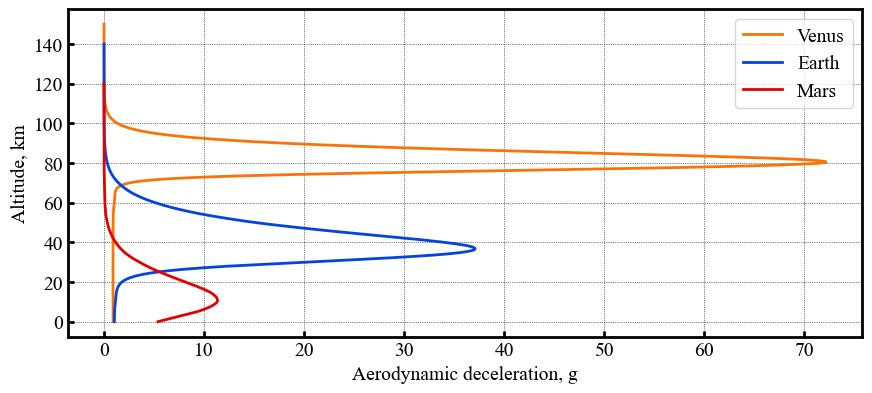

In [4]:
fig = plt.figure()
fig.set_size_inches([10.25, 4.25])

plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.plot(vehicle1.acc_net_g, vehicle1.h_kmc, color='xkcd:orange', linestyle='solid', linewidth=2, label="Venus")
plt.plot(vehicle2.acc_net_g, vehicle2.h_kmc, color='xkcd:blue', linestyle='solid', linewidth=2, label="Earth")
plt.plot(vehicle3.acc_net_g, vehicle3.h_kmc, color='xkcd:red', linestyle='solid', linewidth=2, label="Mars")

plt.xlabel("Aerodynamic deceleration, g",fontsize=14)
plt.ylabel("Altitude, km",fontsize=14)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid('on',linestyle='-', linewidth=0.2)

ax=plt.gca()
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)
ax.xaxis.set_tick_params(width=1, length=4, which='minor')
ax.yaxis.set_tick_params(width=1, length=4, which='minor')
ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)

plt.legend(loc='upper right', fontsize=14, framealpha=0.8)
plt.savefig('../plots/earth-venus-mars-decleration-profile.png', dpi= 300, bbox_inches='tight')
plt.show()

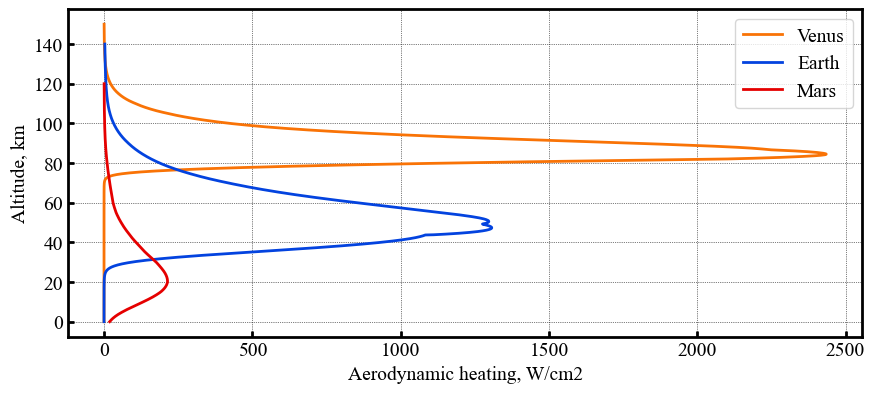

In [13]:
fig = plt.figure()
fig.set_size_inches([10.25, 4.25])

plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.plot(vehicle1.q_stag_total, vehicle1.h_kmc, color='xkcd:orange', linestyle='solid', linewidth=2, label="Venus")
plt.plot(vehicle2.q_stag_total, vehicle2.h_kmc, color='xkcd:blue', linestyle='solid', linewidth=2, label="Earth")
plt.plot(vehicle3.q_stag_total, vehicle3.h_kmc, color='xkcd:red', linestyle='solid', linewidth=2, label="Mars")

plt.xlabel("Aerodynamic heating, W/cm2",fontsize=14)
plt.ylabel("Altitude, km",fontsize=14)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid('on',linestyle='-', linewidth=0.2)

ax=plt.gca()
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)
ax.xaxis.set_tick_params(width=1, length=4, which='minor')
ax.yaxis.set_tick_params(width=1, length=4, which='minor')
ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)

plt.legend(loc='upper right', fontsize=14, framealpha=0.8)

plt.savefig('../plots/earth-venus-mars-heating-profile.png', dpi= 300, bbox_inches='tight')

plt.show()

In [5]:
vehicle4=Vehicle('Jupiter', 125, 365 , 0.0, 0.25*3.14*0.66**2, 0.0, 0.33, planet4)
vehicle4.setInitialState(1000.0,0.0,0.0,50,0.0,-10,0.0,0.0)
vehicle4.setSolverParams(1E-6)
vehicle4.propogateEntry (3600,0.1,0.0)

vehicle5=Vehicle('Saturn', 125, 365 , 0.0, 0.25*3.14*0.66**2, 0.0, 0.33, planet5)
vehicle5.setInitialState(1000.0,0.0,0.0,30,0.0,-10.0,0.0,0.0)
vehicle5.setSolverParams(1E-6)
vehicle5.propogateEntry (3600,0.1,0.0)

vehicle6=Vehicle('Titan', 125, 365 , 0.0, 0.25*3.14*0.66**2, 0.0, 0.33, planet6)
vehicle6.setInitialState(1000.0,0.0,0.0,7.0,0.0,-50.0,0.0,0.0)
vehicle6.setSolverParams(1E-6)
vehicle6.propogateEntry (7200,1.0,0.0)

vehicle7=Vehicle('Uranus', 125, 365 , 0.0, 0.25*3.14*0.66**2, 0.0, 0.33, planet7)
vehicle7.setInitialState(1000.0,0.0,0.0,23,0.0,-15.0,0.0,0.0)
vehicle7.setSolverParams(1E-6)
vehicle7.propogateEntry (3600,1.0,0.0)

vehicle8=Vehicle('Uranus', 125, 365 , 0.0, 0.25*3.14*0.66**2, 0.0, 0.33, planet8)
vehicle8.setInitialState(1000.0,0.0,0.0,23,0.0,-15.0,0.0,0.0)
vehicle8.setSolverParams(1E-6)
vehicle8.propogateEntry(3600,1.0,0.0)

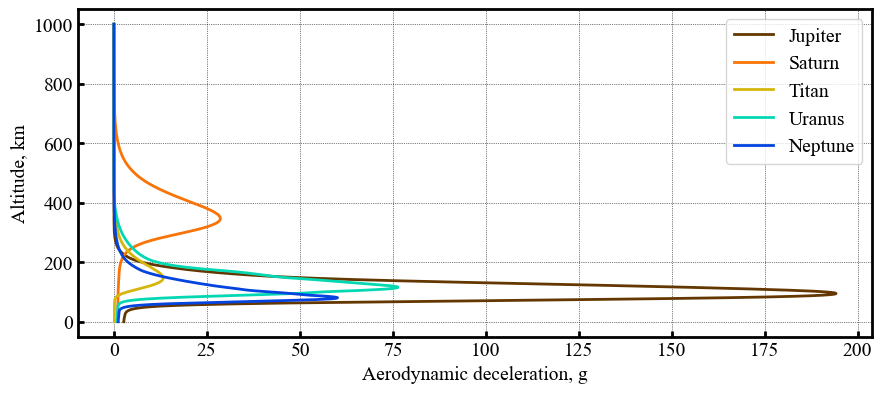

In [6]:
fig = plt.figure()
fig.set_size_inches([10.25, 4.25])

plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.plot(vehicle4.acc_net_g, vehicle4.h_kmc, color='xkcd:brown', linestyle='solid', linewidth=2.0, label="Jupiter")
plt.plot(vehicle5.acc_net_g, vehicle5.h_kmc, color='xkcd:orange', linestyle='solid', linewidth=2.0, label="Saturn")
plt.plot(vehicle6.acc_net_g, vehicle6.h_kmc, color='xkcd:dark yellow', linestyle='solid', linewidth=2.0, label="Titan")
plt.plot(vehicle7.acc_net_g, vehicle7.h_kmc, color='xkcd:aquamarine', linestyle='solid', linewidth=2.0, label="Uranus")
plt.plot(vehicle8.acc_net_g, vehicle8.h_kmc, color='xkcd:blue', linestyle='solid', linewidth=2.0, label="Neptune")

plt.xlabel("Aerodynamic deceleration, g",fontsize=14)
plt.ylabel("Altitude, km",fontsize=14)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid('on',linestyle='-', linewidth=0.2)

ax=plt.gca()
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)
ax.xaxis.set_tick_params(width=1, length=4, which='minor')
ax.yaxis.set_tick_params(width=1, length=4, which='minor')
ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)

plt.legend(loc='upper right', fontsize=14, framealpha=0.8)

plt.savefig('../plots/outer-planets-deceleration-profile.png', dpi= 300, bbox_inches='tight')

plt.show()

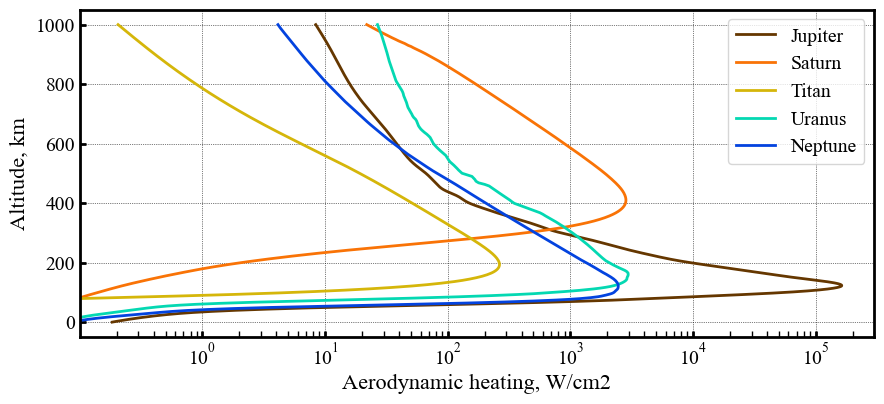

In [7]:
fig = plt.figure()
fig.set_size_inches([10.25, 4.25])

plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.plot(vehicle4.q_stag_total, vehicle4.h_kmc, color='xkcd:brown', linestyle='solid', linewidth=2.0, label="Jupiter")
plt.plot(vehicle5.q_stag_total, vehicle5.h_kmc, color='xkcd:orange', linestyle='solid', linewidth=2.0, label="Saturn")
plt.plot(vehicle6.q_stag_total, vehicle6.h_kmc, color='xkcd:dark yellow', linestyle='solid', linewidth=2.0, label="Titan")
plt.plot(vehicle7.q_stag_total, vehicle7.h_kmc, color='xkcd:aquamarine', linestyle='solid', linewidth=2.0, label="Uranus")
plt.plot(vehicle8.q_stag_total, vehicle8.h_kmc, color='xkcd:blue', linestyle='solid', linewidth=2.0, label="Neptune")

plt.xlabel("Aerodynamic heating, W/cm2",fontsize=16)
plt.ylabel("Altitude, km",fontsize=16)

plt.xscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(np.logspace(0, 5, 6), fontsize=14)
plt.grid('on',linestyle='-', linewidth=0.2)

ax=plt.gca()
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)
ax.xaxis.set_tick_params(width=1, length=4, which='minor')
ax.yaxis.set_tick_params(width=1, length=4, which='minor')
ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)

plt.xlim([0.1, 0.3E6])

plt.legend(loc='upper right', fontsize=14, framealpha=0.8)

plt.savefig('../plots/outer-planets-heating-profile.png', dpi= 300, bbox_inches='tight')

plt.show()